In [1]:
import sys
import os
os.environ['PROJ_DATA'] = "/pscratch/sd/p/plutzner/proj_data"
import xarray as xr
import torch
import torchinfo
import random
import numpy as np
import importlib as imp
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import cartopy.crs as ccrs
import json
import pickle
import gzip
#import matplotlib.colors as mcolorsxx

%load_ext autoreload
%autoreload 2
import utils
import utils.filemethods as filemethods
import databuilder.data_loader as data_loader
import databuilder.data_generator as data_generator
from databuilder.data_generator import ClimateData
import model.loss as module_loss
import model.metric as module_metric
from databuilder.data_generator import multi_input_data_organizer
import databuilder.data_loader as data_loader
from trainer.trainer import Trainer
from model.build_model import TorchModel
from utils import utils
# import databuilder.nino_indices as nino_indices # CAUSES CELL TO HANG

print(f"python version = {sys.version}")
print(f"numpy version = {np.__version__}")
print(f"xarray version = {xr.__version__}")
print(f"pytorch version = {torch.__version__}")

# https://github.com/victoresque/pytorch-template/tree/master

python version = 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
numpy version = 1.26.4
xarray version = 2024.2.0
pytorch version = 2.1.2.post2


### Extract PRECT anomalies time series over Seattle Metro Area (TARGET)

In [2]:
config = utils.get_config("exp006")
seed = config["seed_list"][0]

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic = True

In [3]:
imp.reload(utils)
imp.reload(filemethods)
imp.reload(data_generator)

data = ClimateData(
    config["databuilder"], 
    expname = config["expname"],
    seed=seed,
    data_dir = config["data_dir"], 
    figure_dir=config["figure_dir"],
    target_only = True, 
    fetch=False,
    verbose=False
)

In [4]:
d_train, d_val, d_test = data.fetch_data()

Opening .nc files
Opening .nc files
Opening .nc files
Processing training
Processing target output
Target region is a box region. Calculating regional average
removing seasonal cycle
rolling average
lag
completed processing target
Processing validation
Processing target output
Target region is a box region. Calculating regional average
removing seasonal cycle
rolling average
lag
completed processing target
Processing testing
Processing target output


: 

In [66]:
d_train["y"]

<xarray.DataArray 'TS' (time: 60211)> Size: 482kB
array([ 3.87573391,  3.96420467,  3.75618015, ...,  1.98137201,
       -0.12889053, -2.36624356])
Coordinates:
  * time     (time) object 482kB 1850-01-15 00:00:00 ... 2014-12-31 00:00:00
    lon      float64 8B 123.5
    lat      float64 8B 49.5

In [ ]:
import pickle
import gzip

# data_savename1 = "/pscratch/sd/p/plutzner/E3SM/bigdata/presaved/exp005_d_train_PNW_TS_1850-2014.pkl"
target_PRECT_savename1 = "/Users/C830793391/BIG_DATA/E3SM_Data/presaved/exp006_d_train_SeattleRegional_PRECT_1850-2014.pkl"
with gzip.open(target_PRECT_savename1, "wb") as fp:
    pickle.dump(d_train, fp)

# data_savename2 = "/pscratch/sd/p/plutzner/E3SM/bigdata/presaved/exp005_d_val_PNW_TS_1850-2014.pkl"
target_PRECT_savename2 = "/Users/C830793391/BIG_DATA/E3SM_Data/presaved/exp006_d_val_SeattleRegional_PRECT_1850-2014.pkl"
with gzip.open(target_PRECT_savename2, "wb") as fp:
    pickle.dump(d_val, fp)

# data_savename3 = "/pscratch/sd/p/plutzner/E3SM/bigdata/presaved/exp005_d_test_PNW_TS_1850-2014.pkl"
target_PRECT_savename3 = "/Users/C830793391/BIG_DATA/E3SM_Data/presaved/exp006_d_test_SeattleRegional_PRECT_1850-2014.pkl"
with gzip.open(target_PRECT_savename3, "wb") as fp:
    pickle.dump(d_test, fp)

Process + Pickle Inputs and Targets

In [78]:
# s_dict_train, s_dict_val, s_dict_test = multi_input_data_organizer(config, MJO = False, ENSO = True, TEMP_VC = True)

Opening high-res Nino34 Data
/Users/C830793391/BIG_DATA/E3SM_Data/presaved/ENSO_ne30pg2_HighRes/nino.member0101.daily.nc
/Users/C830793391/BIG_DATA/E3SM_Data/presaved/ENSO_ne30pg2_HighRes/nino.member0151.daily.nc
/Users/C830793391/BIG_DATA/E3SM_Data/presaved/ENSO_ne30pg2_HighRes/nino.member0201.daily.nc
Opening Vancouver TEMP time series
Opening exp005 VC TS input data for TRAINING
Opening exp005 VC TS input data for VALIDATION
Opening exp005 VC TS input data for TESTING
Opening exp005 PNW TS target data for TRAINING
Opening exp005 PNW TS target data for VALIDATION
Opening exp005 PNW TS target data for TESTING
Combining Input and target data
(60211, 2, 3)


In [80]:
# s_dict_train["y"][50:140]

array([ 3.33265304,  3.05752416,  2.33837396,  1.11353909, -0.10847923,
       -0.71248252, -1.78345767, -2.51489696, -3.32155609, -4.21773811,
       -4.39423055, -4.07500645, -4.877881  , -4.51010209, -4.10409927,
       -3.59841597, -2.86930265, -2.75457938, -2.47754905, -1.75795199,
       -1.76177688, -1.88709493, -1.60323702, -1.10624257, -0.36729632,
       -0.77613691, -0.74326016, -0.32229809, -0.22608467, -0.33291674,
       -0.56273215, -0.64874225, -0.42892166, -0.70909653, -1.10531619,
       -1.02205176, -0.58142922,  0.09535478,  0.58275719,  0.98676625,
        2.01570705,  2.71624689,  3.29957714,  3.46442385,  3.4207677 ,
        3.36134976,  3.26874382,  2.60231221,  1.69115793,  0.62585707,
       -0.50767225, -1.72775888, -2.63674422, -3.39545049, -3.86927147,
       -3.50369041, -2.97297858, -2.59033651, -2.25253541, -2.0793858 ,
       -1.75176753, -0.73040258,  0.13708804,  1.03896398,  1.97759632,
        2.50013403,  2.75379803,  3.16510457,  2.76728893,  1.86

In [5]:
s_dict_savename1 = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp006_train.pkl'
# with gzip.open(s_dict_savename1, "wb") as fp:
#     pickle.dump(s_dict_train, fp)

s_dict_savename2 = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp006_val.pkl'
# with gzip.open(s_dict_savename2, "wb") as fp:
#     pickle.dump(s_dict_val, fp)

s_dict_savename3 = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp006_test.pkl'
# with gzip.open(s_dict_savename3, "wb") as fp:
#     pickle.dump(s_dict_test, fp)

with gzip.open(s_dict_savename1, "rb") as obj1:
    train_dat = pickle.load(obj1)
obj1.close()

with gzip.open(s_dict_savename2, "rb") as obj2:
    val_dat = pickle.load(obj2)
obj2.close()

with gzip.open(s_dict_savename3, "rb") as obj3:
    test_dat = pickle.load(obj3)
obj3.close()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp003_train.pkl'

In [84]:
train_dat["y"].shape

(60211,)

In [85]:
print(np.isnan(train_dat["x"][74:-32]).any())
print(np.isnan(val_dat["x"][74:-32]).any())
print(np.isnan(test_dat["x"][74:-32]).any())

print(np.isnan(train_dat["y"][74:-32]).any())
print(np.isnan(val_dat["y"][74:-32]).any())
print(np.isnan(test_dat["y"][74:-32]).any())

False
False
False
False
False
False


Retrieve Data: 


In [86]:
# Setup the Data
front_cutoff = config["databuilder"]["front_cutoff"] # remove front nans : 74 ENSO - two front nans before daily interpolation = 60 days, daily interpolation takes 1/2 the original time step = 15 days TOTAL = ~75
back_cutoff = config["databuilder"]["front_cutoff"]  # remove back nans 

trainset = data_loader.CustomData(config["data_loader"]["data_dir"] + "/Network Inputs/exp004_train.pkl", front_cutoff, back_cutoff)
valset = data_loader.CustomData(config["data_loader"]["data_dir"] + "/Network Inputs/exp004_val.pkl", front_cutoff, back_cutoff)

train_loader = torch.utils.data.DataLoader(
    trainset,
    batch_size=config["data_loader"]["batch_size"],
    shuffle=True,
    drop_last=False,
)

val_loader = torch.utils.data.DataLoader(
    valset,
    batch_size=config["data_loader"]["batch_size"],
    shuffle=False,
    drop_last=False,
)

X1 shape: (60063, 2)
Target shape: (60063,)
X1 shape: (60063, 2)
Target shape: (60063,)


Model Setup

In [87]:
# Setup the Model
model = TorchModel(
    config=config["arch"],
    target_mean=trainset.target.mean(axis=0),
    target_std=trainset.target.std(axis=0),
)
model.freeze_layers(freeze_id="tau")
optimizer = getattr(torch.optim, config["optimizer"]["type"])(
    model.parameters(), **config["optimizer"]["args"]
)
criterion = getattr(module_loss, config["criterion"])()
metric_funcs = [getattr(module_metric, met) for met in config["metrics"]]

# Build the trainer
device = utils.prepare_device(config["device"])
trainer = Trainer(
    model,
    criterion,
    metric_funcs,
    optimizer,
    max_epochs=config["trainer"]["max_epochs"],
    data_loader=train_loader,
    validation_data_loader=val_loader,
    device=device,
    config=config,
)

torch.backends.mps is available
tensor([1.], device='mps:0')


In [88]:
# Visualize the model
torchinfo.summary(
    model,
    [   trainset.input[: config["data_loader"]["batch_size"]].shape ],
    verbose=1,
    col_names=("input_size", "output_size", "num_params"),
)

# Train the Model
model.to(device)
trainer.fit()

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
TorchModel                               [64, 2]                   [64, 4]                   62
├─Linear: 1-1                            [64, 2]                   [64, 6]                   18
├─Linear: 1-2                            [64, 6]                   [64, 4]                   28
Total params: 108
Trainable params: 103
Non-trainable params: 5
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
Epoch   0/3000
  10.8s - loss: 4.13366 - val_loss: 4.13424
Epoch   1/3000
  10.1s - loss: 4.12657 - val_loss: 4.12757
Epoch   2/3000
  10.1s - loss: 4.12000 - val_loss: 4.12107
Epoch   3/3000
  10.5s - loss: 4.11332 - val_loss: 4.11465
Epoch   4/3000
  10.2s - loss: 4.10711 - val_loss: 4.10821
Epoch   5/3000
  10.2s - loss: 4.10024 - val_loss: 4.10174
Epoch   6/3000
  10.3s - loss: 4.09340 - val_loss: 4

KeyboardInterrupt: 

dict_keys(['epoch', 'loss', 'val_loss', 'custom_mae', 'iqr_capture', 'sign_test', 'val_custom_mae', 'val_iqr_capture', 'val_sign_test'])


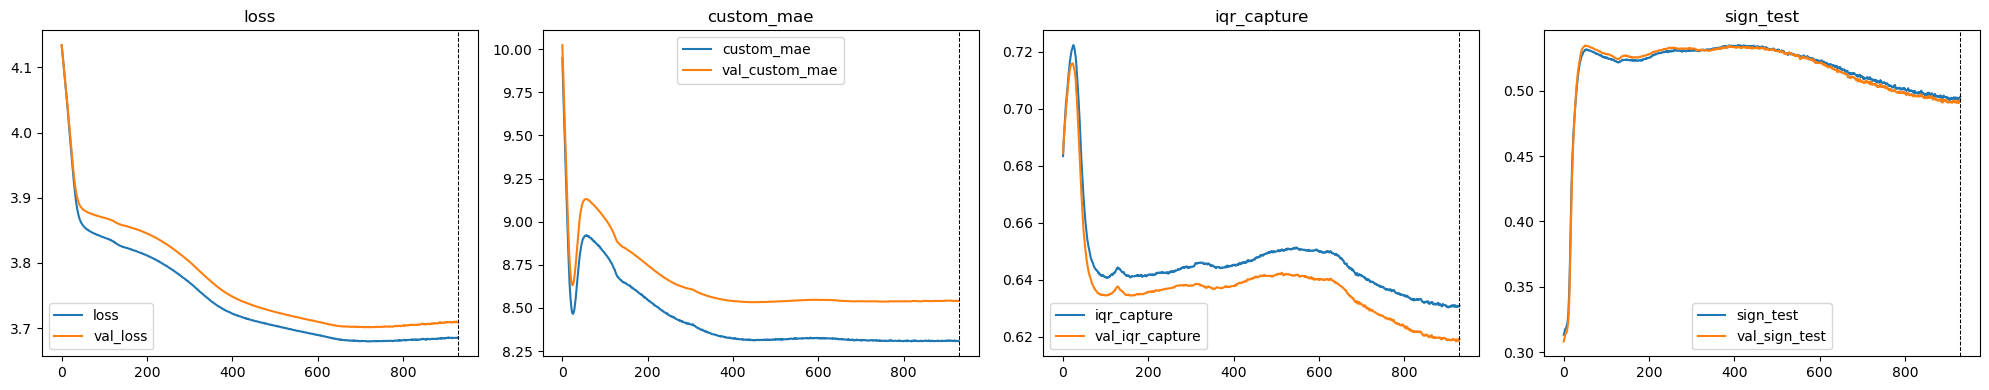

In [89]:
print(trainer.log.history.keys())

plt.figure(figsize=(20, 4))
for i, m in enumerate(("loss", *config["metrics"])):
    plt.subplot(1, 4, i + 1)
    plt.plot(trainer.log.history["epoch"], trainer.log.history[m], label=m)
    plt.plot(
        trainer.log.history["epoch"], trainer.log.history["val_" + m], label="val_" + m
    )
    plt.axvline(
       x=trainer.early_stopper.best_epoch, linestyle="--", color="k", linewidth=0.75
    )
    plt.title(m)
    plt.legend()
plt.tight_layout()
plt.show()

Plot Predictions Against Climatology: 

In [777]:
with torch.inference_mode():
    print(device)
    output = model.predict(dataset=valset, batch_size=128, device=device)
output[:20]

mps


array([[-3.1248946 , 12.506565  ,  0.27346838,  1.        ],
       [-3.1249378 , 12.505836  ,  0.27331156,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.203824  , -0.27367443,  1.        ],
       [-3.2753863 , 10.

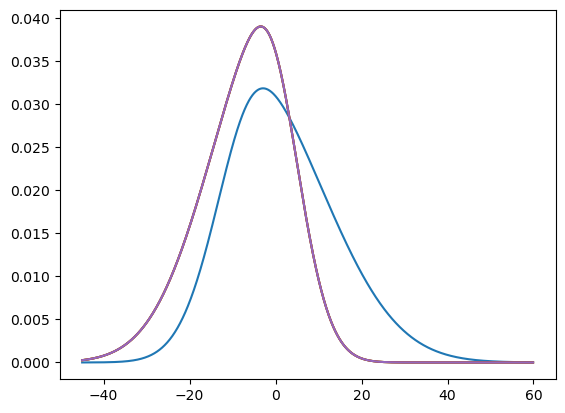

In [778]:
from shash.shash_torch import Shash
# params = np.zeros((2,4))
# # mu = 0; sigma=1., gamma=0, tau=1
# params[:,1] = 1.
# params[:,-1] = .003
# s = Shash(params)
s = Shash(output)

x = np.arange(-45,60,.1)
y = s.prob(x)
np.shape(y)

for i in (1, 2, 3, 4, 5):
    plt.plot(x, y[:,i])

tensor([-1.6354, -0.0265, -2.8445, -2.7248, 20.9809])


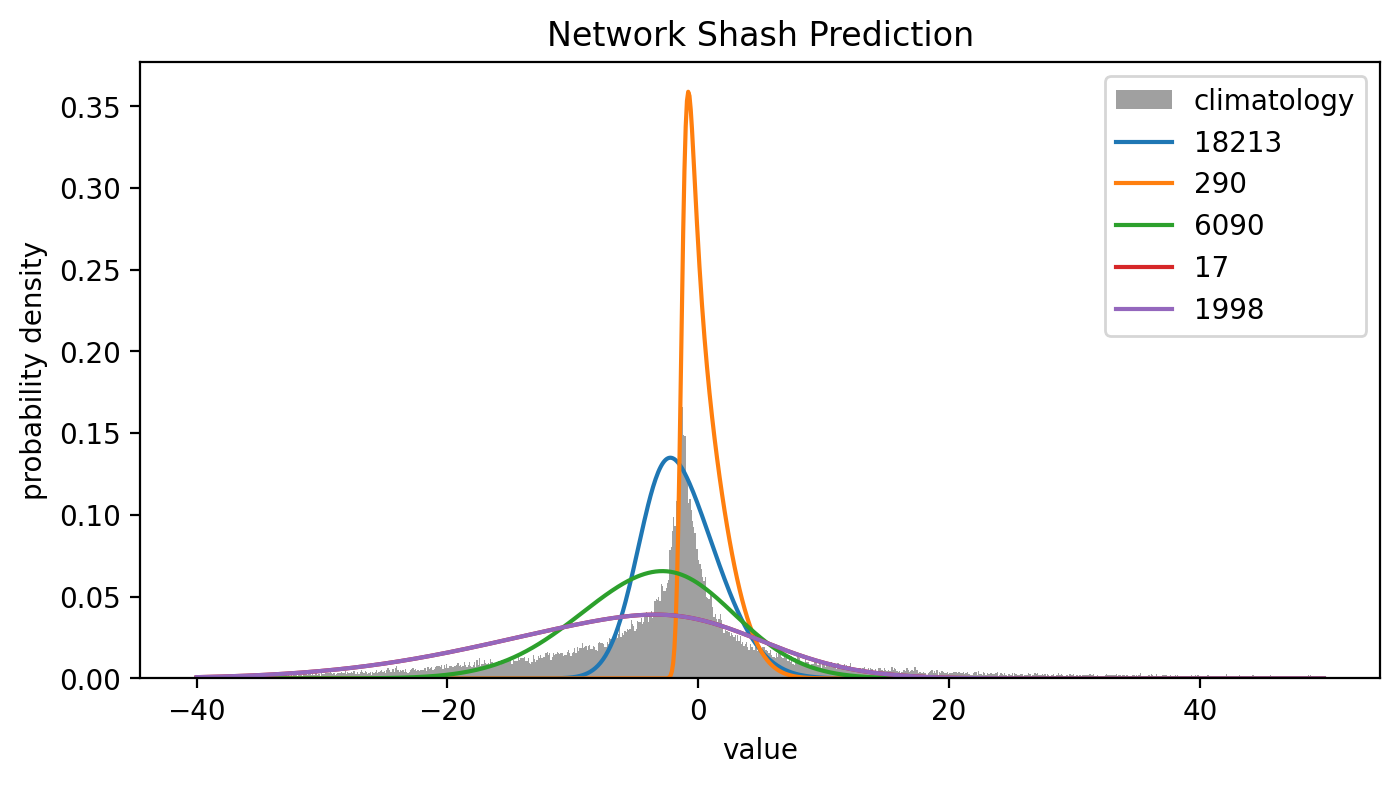

In [784]:
from databuilder.climatology import deriveclimatology

samples = [18213, 290, 6090, 17, 1998]

x = np.arange(-40, 50, 0.1)

cfile = '/Users/C830793391/BIG_DATA/E3SM_Data/presaved/Network Inputs/exp002_test.pkl'

p = deriveclimatology(output, cfile, samples, x, valset)


In [785]:
valset.target[290]

-0.026514933423712122

In [772]:
valset.target[18213]

-1.6353523363523854

In [773]:
valset.target[1998]

20.98091208896154

In [774]:
valset.target[6090]

-2.844547247735154

In [775]:
valset.target[17]

-2.7247618169944414

In [776]:
valset.target[0]

9.173210320182852